<a href="https://colab.research.google.com/github/Sergey7OV/CompoZit/blob/main/VKR_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Импортируем все необходимые библиотеки для исследования
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
sns.set_style('darkgrid')

In [ ]:
#Cмонтируем весь Google Disk в Colab:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Загрузим датасет из оставшихся 23 строчек
df_22 = pd.read_excel("/content/gdrive/MyDrive/Colab Notebooks/ВКР/data/X_sum_22.xlsx")
#Удаляем лишний столбец
df_22 = df_22.drop(columns='Unnamed: 0')

In [ ]:
df_22.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Шаг нашивки,Плотность нашивки,Угол нашивки
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,2.919678,1978.695652,738.736842,111.860000,22.267857,284.615385,470.000000,73.333333,2455.555556,220.000000,6.434783,55.956522,0.130435
std,0.901251,72.256132,333.385368,28.518029,2.429067,40.967325,308.868904,3.162278,496.553780,57.207755,2.727404,14.496013,0.344350
min,1.598174,1880.000000,205.000000,30.000000,21.250000,100.000000,210.000000,70.000000,1800.000000,120.000000,0.000000,0.000000,0.000000
25%,2.209309,1915.000000,537.500000,111.860000,21.250000,284.615385,210.000000,70.000000,2000.000000,220.000000,4.000000,52.000000,0.000000
50%,2.877358,1980.000000,738.736842,129.000000,21.250000,300.000000,380.000000,73.333333,2455.555556,220.000000,7.000000,57.000000,0.000000
75%,3.544678,2030.000000,817.000000,129.000000,22.267857,300.000000,470.000000,75.000000,3000.000000,220.000000,9.000000,60.000000,0.000000
max,4.897959,2160.000000,1628.000000,129.000000,33.000000,300.000000,1010.000000,78.000000,3000.000000,300.000000,10.000000,70.000000,1.000000


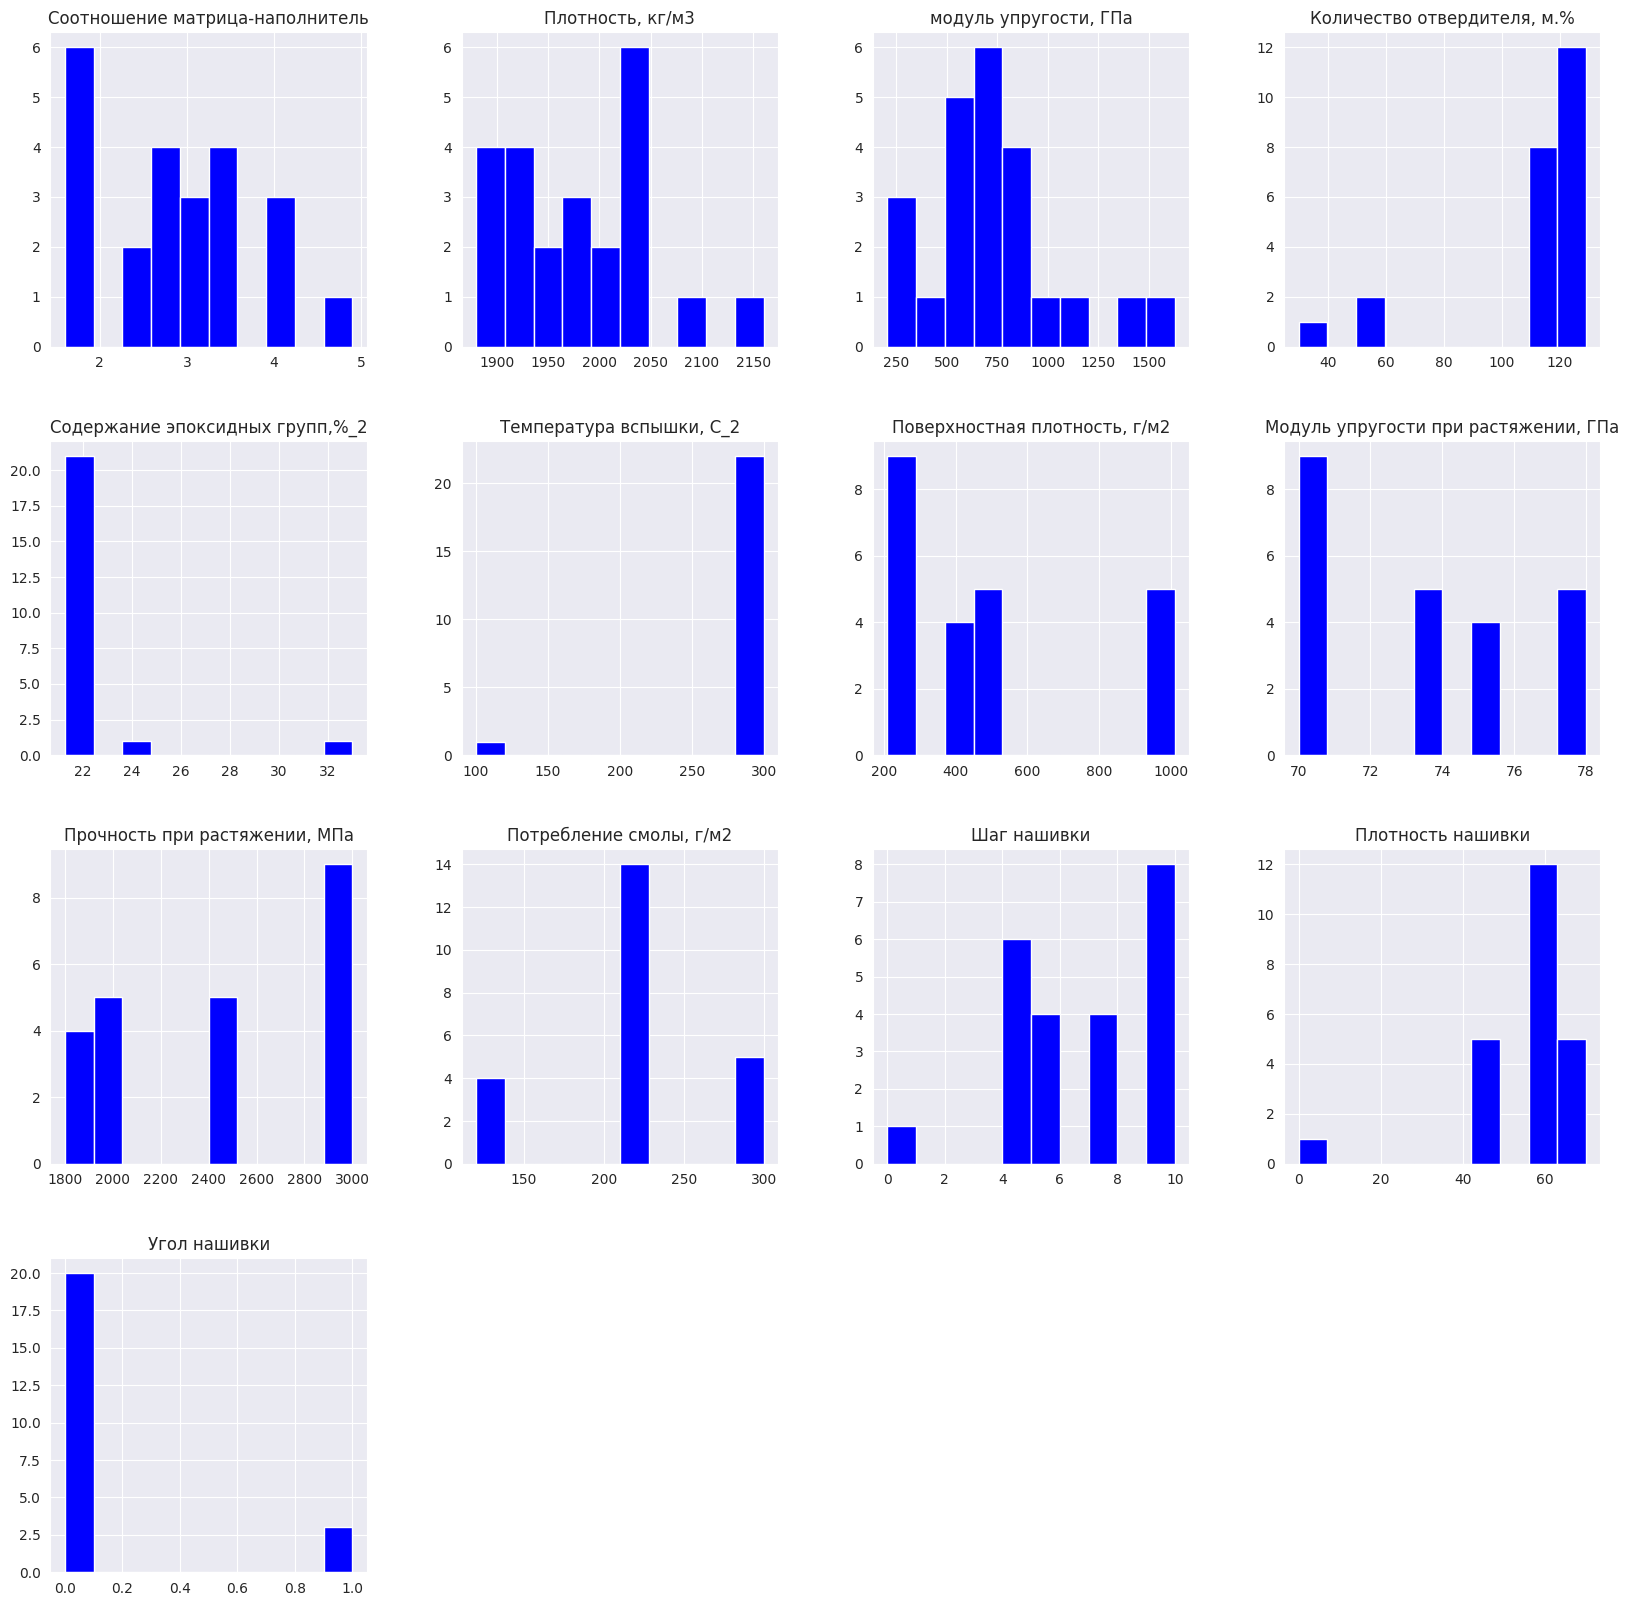

In [ ]:
# Построим гистограммы распределения каждой из переменных без нормализации и исключения выбросов
df_22.hist(figsize = (20,20), color = "b")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

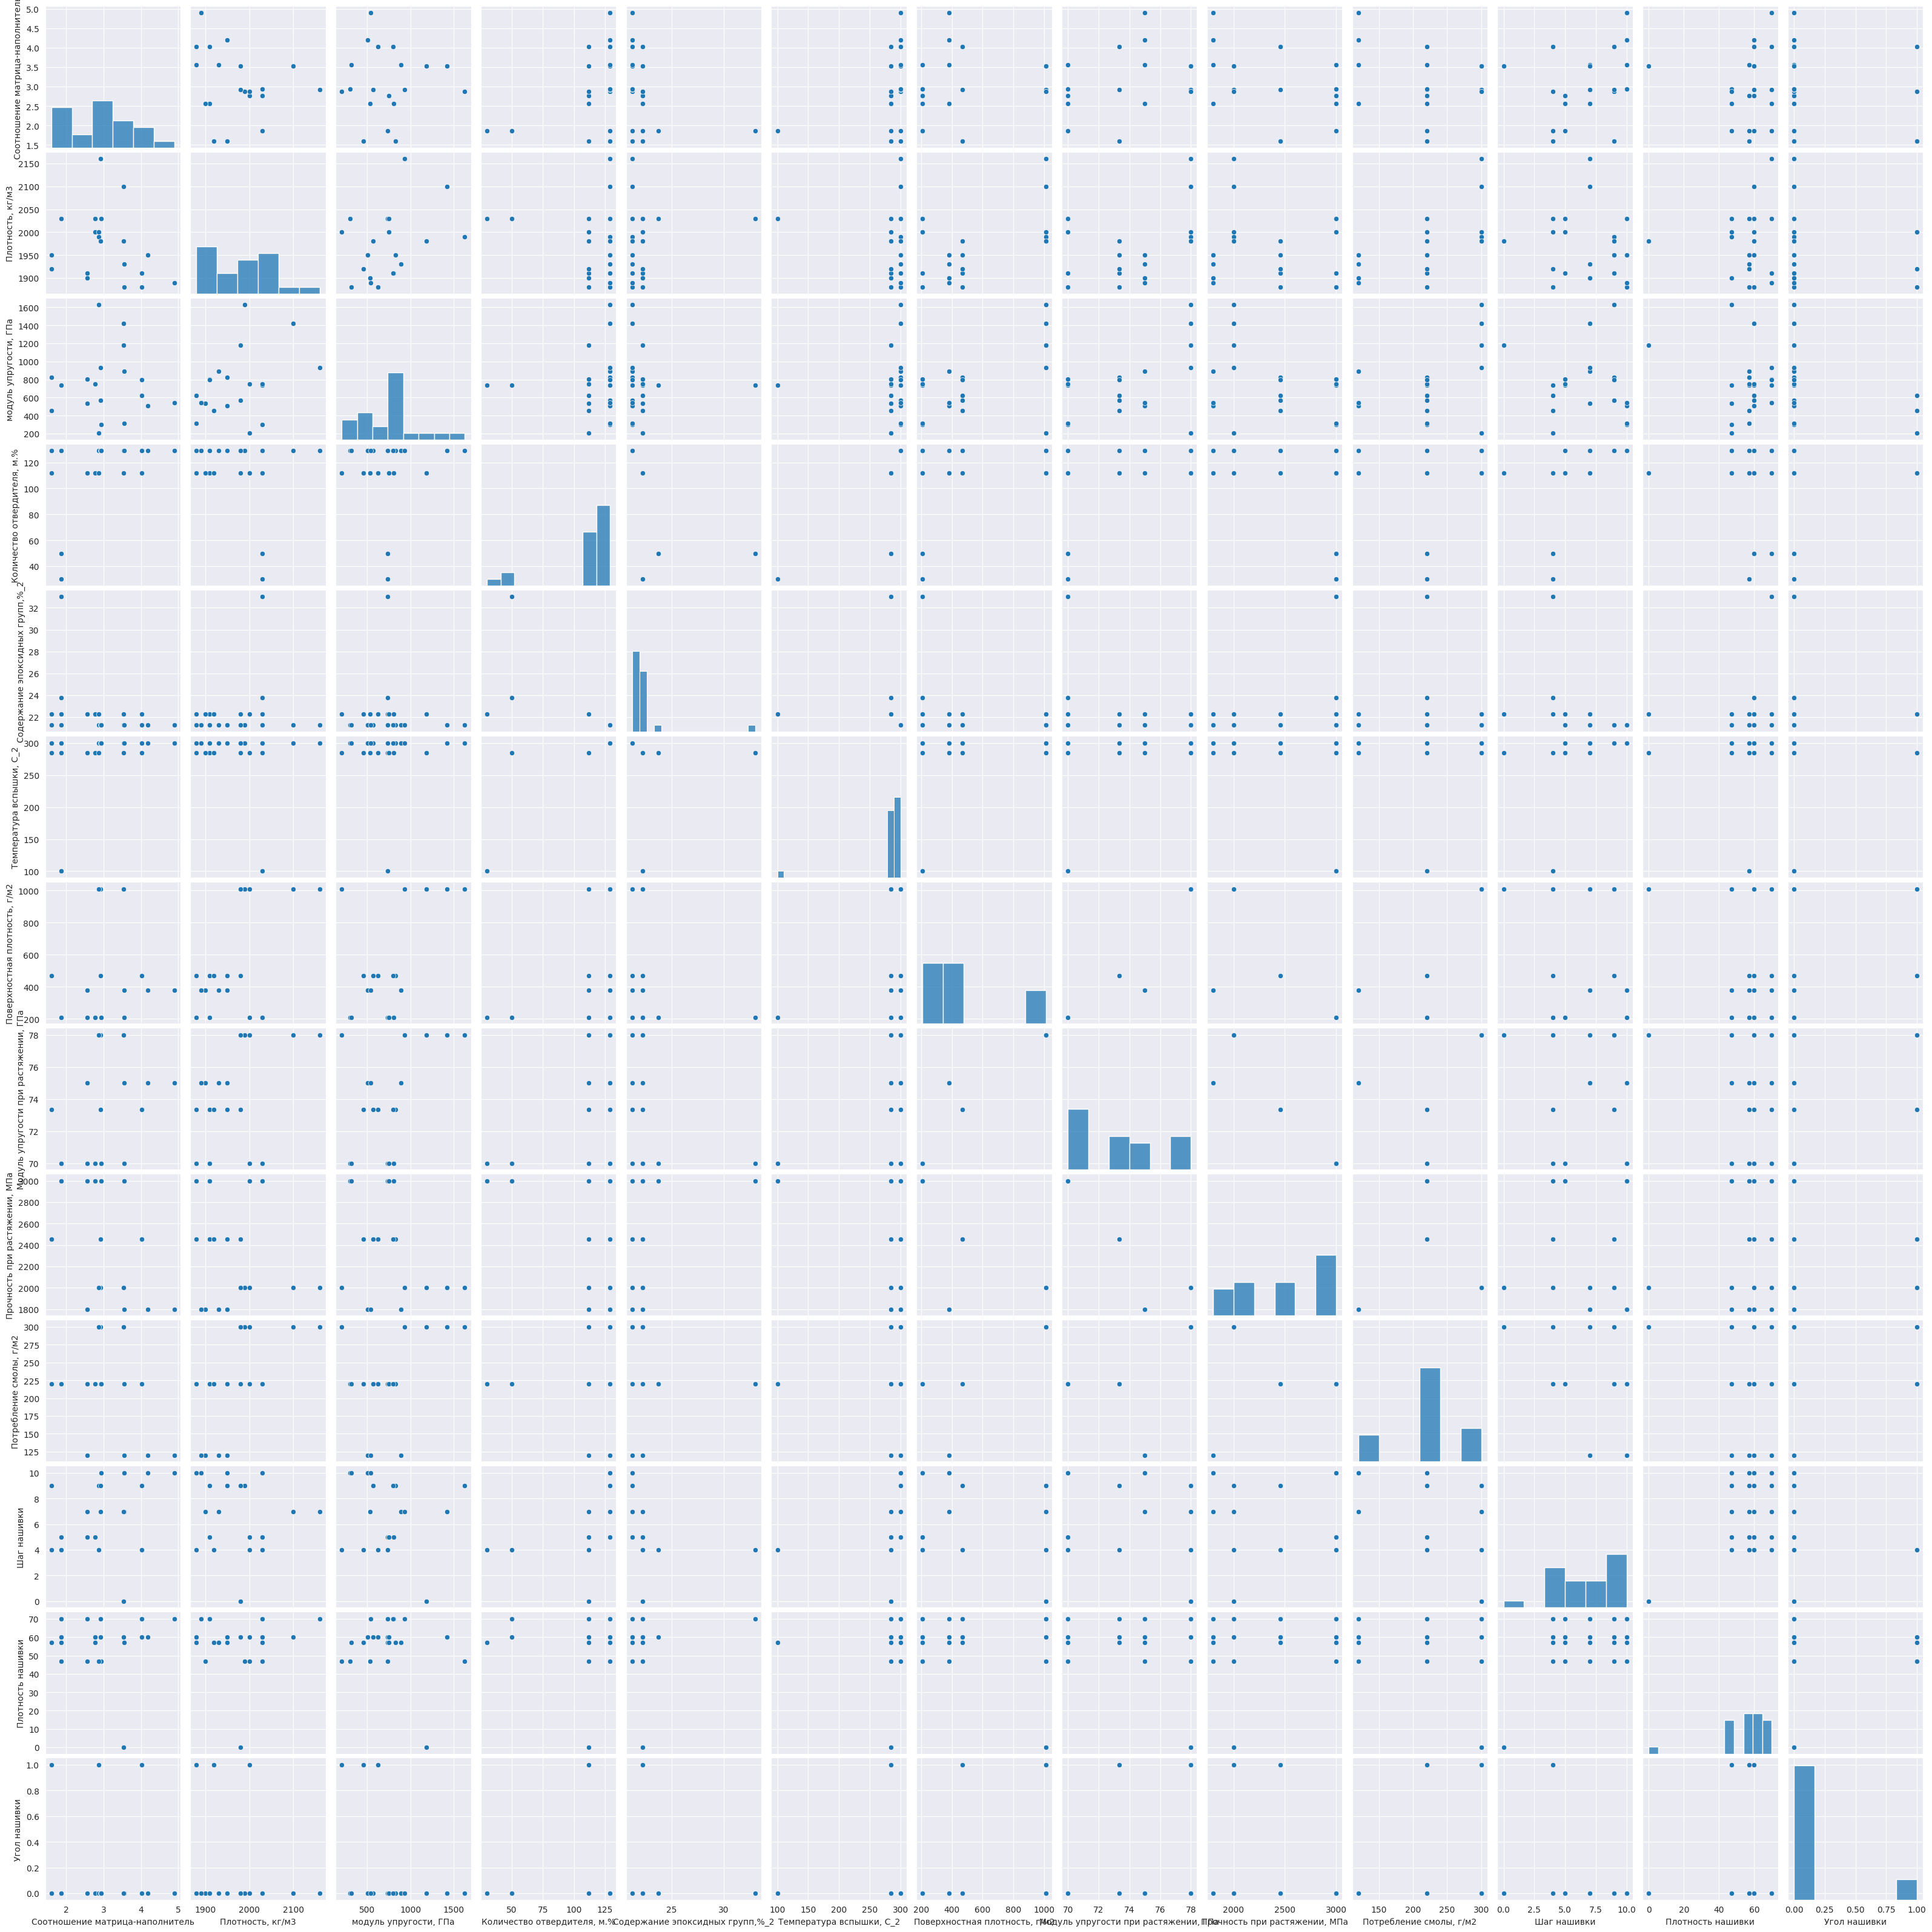

In [ ]:
#Нарисуем попарные графики рассеяния точек
sns.pairplot(df_22[df_22.columns])
plt.show

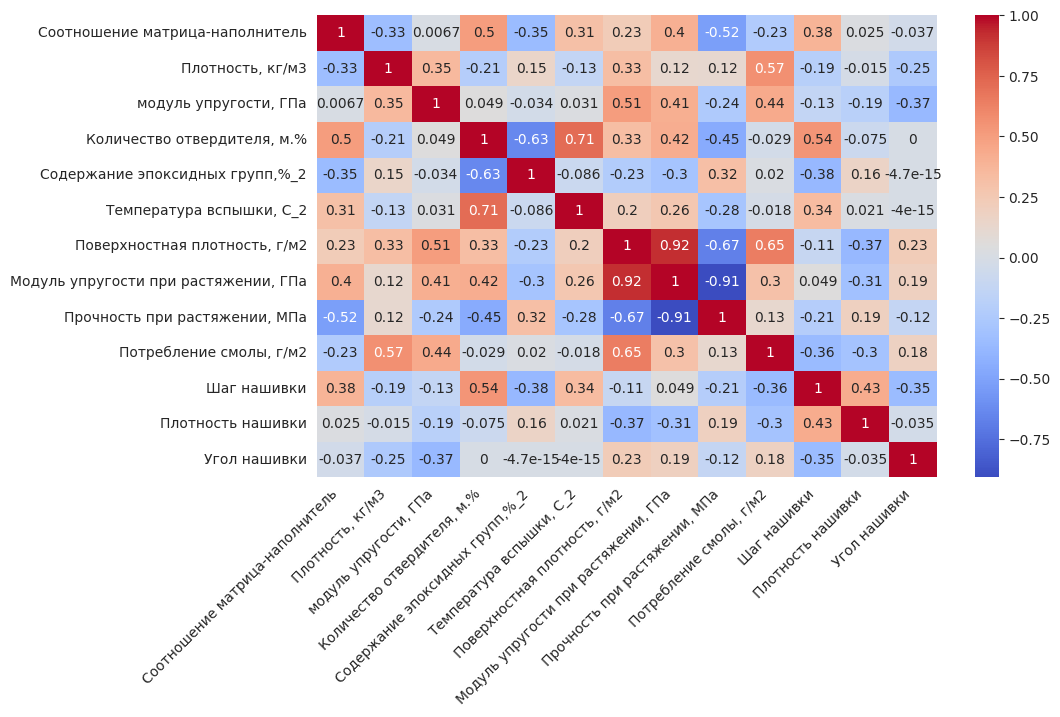

In [ ]:
# Матрица корреляции
correlation_matrix = df_22.corr()
# Выводим признаки на тепловую карту
plt.figure(figsize= (10, 6))
sns.heatmap(correlation_matrix, annot = True, cmap='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# Выведем средние значения
df_22.mean()

Соотношение матрица-наполнитель            2.919678
Плотность, кг/м3                        1978.695652
модуль упругости, ГПа                    738.736842
Количество отвердителя, м.%              111.860000
Содержание эпоксидных групп,%_2           22.267857
Температура вспышки, С_2                 284.615385
Поверхностная плотность, г/м2            470.000000
Модуль упругости при растяжении, ГПа      73.333333
Прочность при растяжении, МПа           2455.555556
Потребление смолы, г/м2                  220.000000
Шаг нашивки                                6.434783
Плотность нашивки                         55.956522
Угол нашивки                               0.130435
dtype: float64

In [ ]:
#Выведем медианные значения
df_22.median()

Соотношение матрица-наполнитель            2.877358
Плотность, кг/м3                        1980.000000
модуль упругости, ГПа                    738.736842
Количество отвердителя, м.%              129.000000
Содержание эпоксидных групп,%_2           21.250000
Температура вспышки, С_2                 300.000000
Поверхностная плотность, г/м2            380.000000
Модуль упругости при растяжении, ГПа      73.333333
Прочность при растяжении, МПа           2455.555556
Потребление смолы, г/м2                  220.000000
Шаг нашивки                                7.000000
Плотность нашивки                         57.000000
Угол нашивки                               0.000000
dtype: float64

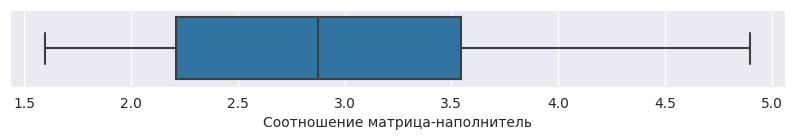

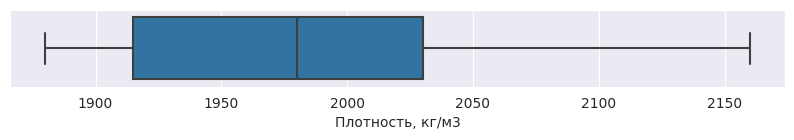

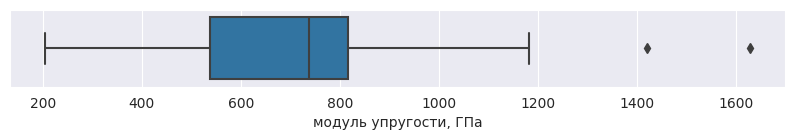

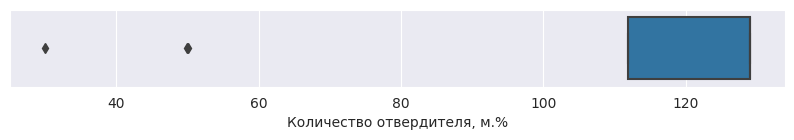

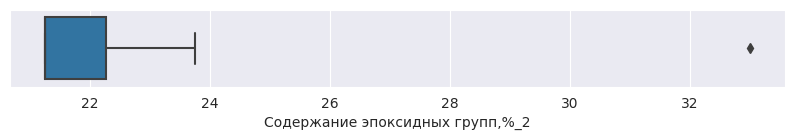

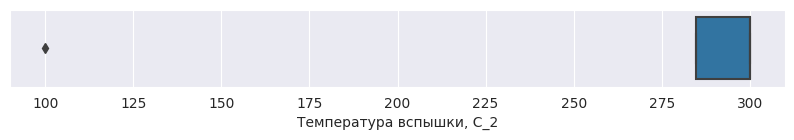

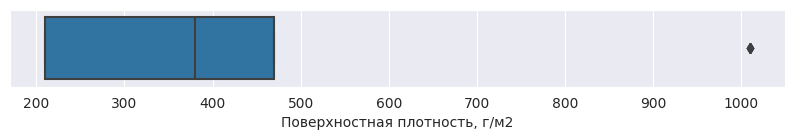

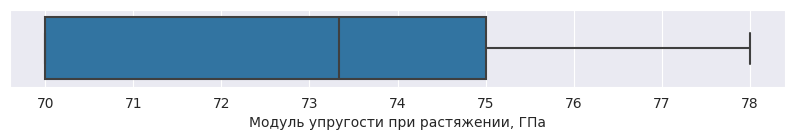

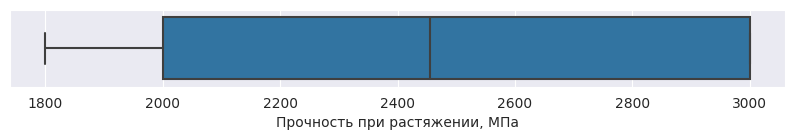

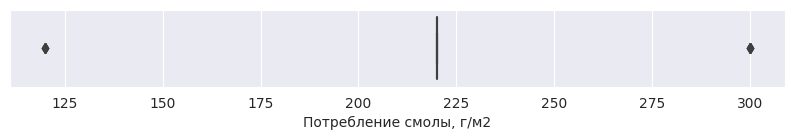

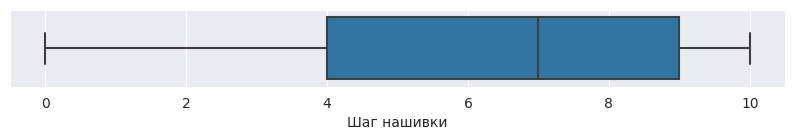

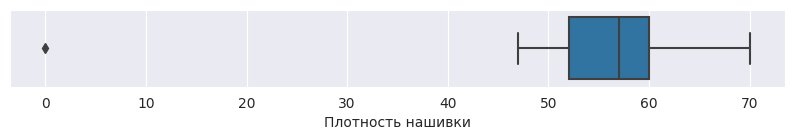

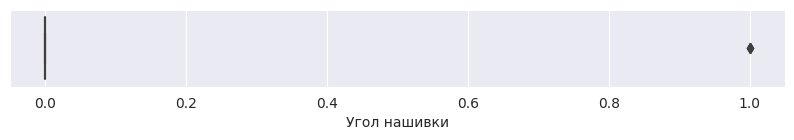

In [ ]:
#Визулизация данных с помощью boxplot
for col in df_22.columns:
  plt.figure(figsize=(10,1))
  sns.boxplot(x=df_22[col])
  plt.show()

In [ ]:
#Поиск уникальных значений с помощью функции nunique
df_22.nunique()

Соотношение матрица-наполнитель         14
Плотность, кг/м3                        13
модуль упругости, ГПа                   20
Количество отвердителя, м.%              5
Содержание эпоксидных групп,%_2          4
Температура вспышки, С_2                 3
Поверхностная плотность, г/м2            4
Модуль упругости при растяжении, ГПа     4
Прочность при растяжении, МПа            4
Потребление смолы, г/м2                  3
Шаг нашивки                              6
Плотность нашивки                        5
Угол нашивки                             2
dtype: int64

In [ ]:
#Нормальзуем значения с помощью метода MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
df_norm_22 = pd.DataFrame(min_max_scaler.fit_transform(df_22), columns = df_22.columns, index=df_22.index)
df_norm_22.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Шаг нашивки,Плотность нашивки,Угол нашивки
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,0.400482,0.352484,0.375079,0.826869,0.086626,0.923077,0.325000,0.416667,0.546296,0.555556,0.643478,0.799379,0.130435
std,0.273124,0.258058,0.234283,0.288061,0.206729,0.204837,0.386086,0.395285,0.413795,0.317821,0.272740,0.207086,0.344350
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.185205,0.125000,0.233661,0.826869,0.000000,0.923077,0.000000,0.000000,0.166667,0.555556,0.400000,0.742857,0.000000
50%,0.387657,0.357143,0.375079,1.000000,0.000000,1.000000,0.212500,0.416667,0.546296,0.555556,0.700000,0.814286,0.000000
75%,0.589888,0.535714,0.430077,1.000000,0.086626,1.000000,0.325000,0.625000,1.000000,0.555556,0.900000,0.857143,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Сохраним очищенные и нормализованные данные в файл "X_sum_norm.xlsx"
df_norm_22.to_excel("/content/gdrive/MyDrive/Colab Notebooks/ВКР/data/X_norm_22.xlsx")

In [ ]:
#Загружаем объединенный, очищенный и нормализорванный датасет
df_norm_22 = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/ВКР/data/X_norm_22.xlsx')
#Удаляем лишний столбец
df_norm_22 = df_norm_22.drop(columns='Unnamed: 0')
df_norm_22.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Шаг нашивки,Плотность нашивки,Угол нашивки
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,0.400482,0.352484,0.375079,0.826869,0.086626,0.923077,0.325000,0.416667,0.546296,0.555556,0.643478,0.799379,0.130435
std,0.273124,0.258058,0.234283,0.288061,0.206729,0.204837,0.386086,0.395285,0.413795,0.317821,0.272740,0.207086,0.344350
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.185205,0.125000,0.233661,0.826869,0.000000,0.923077,0.000000,0.000000,0.166667,0.555556,0.400000,0.742857,0.000000
50%,0.387657,0.357143,0.375079,1.000000,0.000000,1.000000,0.212500,0.416667,0.546296,0.555556,0.700000,0.814286,0.000000
75%,0.589888,0.535714,0.430077,1.000000,0.086626,1.000000,0.325000,0.625000,1.000000,0.555556,0.900000,0.857143,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
